<a href="https://colab.research.google.com/github/sumedhasjs/DoS-and-DDoS-Attack-Detection/blob/main/DDoS_Attack_SD_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd 'gdrive/MyDrive'

/content/gdrive/MyDrive


In [3]:
!ls 'FYP Dataset'

DDoS1.csv   Idle12.csv	Idle20.csv  Idle7.csv	   Working16.csv  Working5.csv
DDoS2.csv   Idle13.csv	Idle21.csv  Idle8.csv	   Working17.csv  Working6.csv
DDoS3.csv   Idle14.csv	Idle22.csv  Idle9.csv	   Working18.csv  Working7.csv
DDoS4.csv   Idle15.csv	Idle23.csv  Working10.csv  Working19.csv  Working8.csv
DoS1.csv    Idle16.csv	Idle2.csv   Working11.csv  Working1.csv   Working9.csv
DoS2.csv    Idle17.csv	Idle3.csv   Working12.csv  Working20.csv
file.csv    Idle18.csv	Idle4.csv   Working13.csv  Working2.csv
Idle10.csv  Idle19.csv	Idle5.csv   Working14.csv  Working3.csv
Idle11.csv  Idle1.csv	Idle6.csv   Working15.csv  Working4.csv


In [4]:
import pandas as pd

In [5]:
attack=pd.read_csv('FYP Dataset/DDoS1.csv')
attack = attack.sample(frac = 1)
print(len(attack))
attack=attack[:3000]
working=pd.read_csv('FYP Dataset/Working1.csv')
working = working.sample(frac = 1)
print(len(working))
working=working[:3000]
idle=pd.read_csv('FYP Dataset/Idle1.csv')
idle = idle.sample(frac = 1)
print(len(idle))
idle=idle[:3000]

10788
3042
4444


In [6]:
import numpy as np
import matplotlib.pyplot as plt

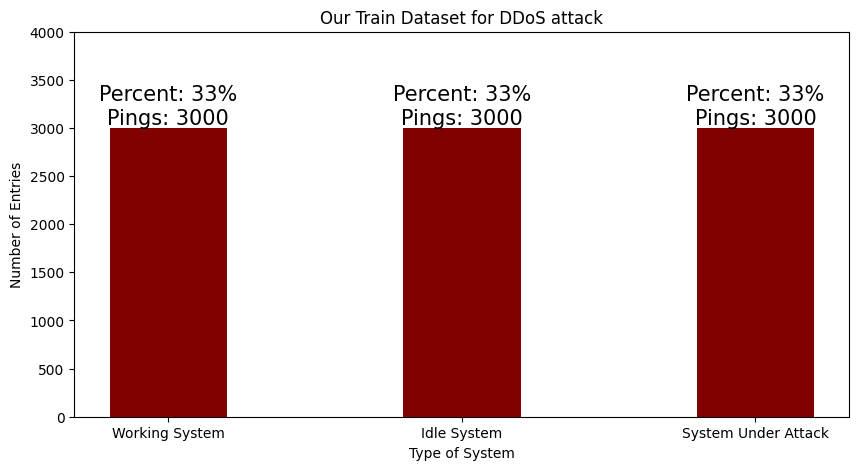

In [7]:
data={'Working System': len(working), 'Idle System': len(idle), 'System Under Attack': len(attack)}
typeOfSystem= list(data.keys())
NumberOfEntries=list(data.values())
fig = plt.figure(figsize = (10, 5))
total=len(working)+len(idle)+len(attack)
graph=plt.bar(typeOfSystem, NumberOfEntries, color ='maroon',
        width = 0.4)
for bar in graph:
    height = bar.get_height()
    percent=height*100/total
    plt.annotate( "Percent: {}%\nPings: {}".format(int(percent),height),(bar.get_x() + bar.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)
plt.ylim(0,4000 )
plt.xlabel("Type of System")
plt.ylabel("Number of Entries")
plt.title("Our Train Dataset for DDoS attack")
plt.show()

In [8]:
idle["Attack"] = -1
working["Attack"] = -1
attack["Attack"] = 1

In [9]:
ls=[working,idle,attack]
dataset_train=pd.concat(ls)

In [10]:
len(dataset_train)

9000

In [11]:
dataset_train = dataset_train.drop(["Local Host","Remote Host","Service Name","Capture Time","Last Packet Time"],axis=1)
dataset_train = dataset_train.reset_index(drop = True)
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack
0,TCP,192.168.29.50,91.108.56.175,50372.0,443.0,"7,664","3,627,021 Bytes","3,934,885 Bytes",60.2 KB/Sec,00:58.8,-1
1,UDP,192.168.29.184,239.255.255.250,45412.0,1900.0,2,631 Bytes,"1,053 Bytes",0.0 KB/Sec,26:02.0,-1
2,TCP,192.168.29.50,72.251.249.13,49362.0,443.0,22,"10,117 Bytes","11,634 Bytes",1.0 KB/Sec,00:09.5,-1
3,TCP,192.168.29.50,35.197.154.200,55422.0,443.0,39,"23,774 Bytes","25,891 Bytes",5.1 KB/Sec,00:04.6,-1
4,TCP,192.168.29.50,13.89.179.8,63063.0,443.0,13,280 Bytes,"1,069 Bytes",0.0 KB/Sec,01:49.5,-1


In [12]:
dataset_train['Throughput']=0
dataset_train["Duration in seconds"] = 0

In [13]:
import string
from datetime import datetime
for i in range(len(dataset_train)):
  t = datetime.strptime(dataset_train["Duration"][i].split('.')[0], '%M:%S').time()
  dataset_train["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
  
  if(type(dataset_train["Packets"][i])==int or type(dataset_train["Packets"][i])==float):
    dataset_train["Packets"][i] = dataset_train["Packets"][i]
  else:
    if(type(dataset_train["Packets"][i])==str):
      dataset_train["Packets"][i] = dataset_train["Packets"][i].translate(str.maketrans('', '', string.punctuation))
      dataset_train["Packets"][i] = int(dataset_train["Packets"][i].split(' ')[0])
      dataset_train["Packets"][i] = int(dataset_train["Packets"][i])

<ipython-input-13-22298153ade2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
<ipython-input-13-22298153ade2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Packets"][i] = dataset_train["Packets"][i].translate(str.maketrans('', '', string.punctuation))
<ipython-input-13-22298153ade2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

In [14]:
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,TCP,192.168.29.50,91.108.56.175,50372.0,443.0,7664,"3,627,021 Bytes","3,934,885 Bytes",60.2 KB/Sec,00:58.8,-1,0,58
1,UDP,192.168.29.184,239.255.255.250,45412.0,1900.0,2,631 Bytes,"1,053 Bytes",0.0 KB/Sec,26:02.0,-1,0,1562
2,TCP,192.168.29.50,72.251.249.13,49362.0,443.0,22,"10,117 Bytes","11,634 Bytes",1.0 KB/Sec,00:09.5,-1,0,9
3,TCP,192.168.29.50,35.197.154.200,55422.0,443.0,39,"23,774 Bytes","25,891 Bytes",5.1 KB/Sec,00:04.6,-1,0,4
4,TCP,192.168.29.50,13.89.179.8,63063.0,443.0,13,280 Bytes,"1,069 Bytes",0.0 KB/Sec,01:49.5,-1,0,109


In [15]:
for i in range(len(dataset_train)):
  val = dataset_train["Packets"][i]/dataset_train["Duration in seconds"][i]
  if val==np.inf or val==-np.inf:
    val = 10**15
  dataset_train["Throughput"][i] = val

<ipython-input-15-ad44b00ee02e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Throughput"][i] = val
<ipython-input-15-ad44b00ee02e>:2: RuntimeWarning: divide by zero encountered in long_scalars
  val = dataset_train["Packets"][i]/dataset_train["Duration in seconds"][i]


In [16]:
dataset_train=dataset_train.sort_values(by=['Throughput'])

In [17]:
throughput=dataset_train['Throughput']

In [18]:
throughput.replace([np.inf, -np.inf], np.nan, inplace=True)
throughput.dropna(how="all", inplace=True)

In [19]:
stdev = throughput.std()
mean = throughput.mean()
print(mean,stdev)

313000000000007.44 463740115785045.4


In [20]:
data=dataset_train["Throughput"].tolist()

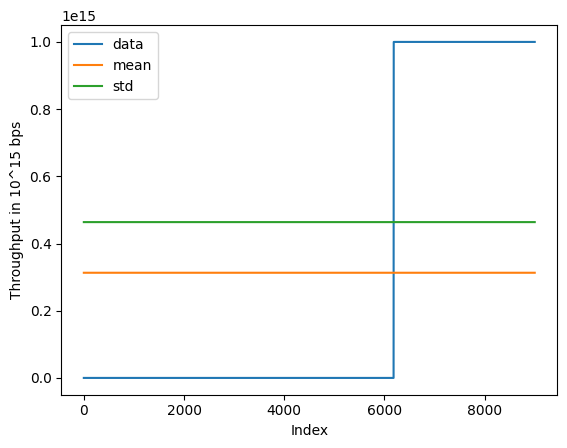

In [21]:
df = pd.DataFrame({
      'data': data,
      'mean': [mean for i in range(len(data))],
      'std': [stdev for i in range(len(data))]})
df.plot()
plt.xlabel("Index")
plt.ylabel("Throughput in 10^15 bps")
plt.show()

In [22]:
dataset_train["Anomaly"] = 1
dataset_train.replace(np.nan,np.inf,inplace=True)
for i in range(0,len(dataset_train["Total Size"])):
  if(abs(dataset_train["Throughput"][i]-mean)<stdev):
    dataset_train["Anomaly"][i] = -1

<ipython-input-22-409f2dd33fc5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Anomaly"][i] = -1


In [23]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score, f1_score, classification_report
import seaborn as sn
tn, fp, fn, tp = confusion_matrix(dataset_train["Attack"], dataset_train["Anomaly"]).ravel()
precision = precision_score(dataset_train["Attack"], dataset_train["Anomaly"])
recall=recall_score(dataset_train["Attack"], dataset_train["Anomaly"])
accuracy = accuracy_score(dataset_train["Attack"], dataset_train["Anomaly"])
f1_score=f1_score(dataset_train["Attack"], dataset_train["Anomaly"])
ClassificationReport=classification_report(dataset_train["Attack"], dataset_train["Anomaly"])
print("True Positives: ",tp)
print("\nFalse Positives: ",fp)
print("\nTrue Negatives: ",tn)
print("\nFalse Negatives: ",fn)
print("\nAccuracy: ",accuracy)
print("\nPrecision: ",precision)
print("\nRecall: ",recall)
print("\nF1 Score: ",f1_score)
print("\nClassification Report: \n")
print(ClassificationReport)

True Positives:  2817

False Positives:  0

True Negatives:  6000

False Negatives:  183

Accuracy:  0.9796666666666667

Precision:  1.0

Recall:  0.939

F1 Score:  0.9685404847859721

Classification Report: 

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98      6000
           1       1.00      0.94      0.97      3000

    accuracy                           0.98      9000
   macro avg       0.99      0.97      0.98      9000
weighted avg       0.98      0.98      0.98      9000



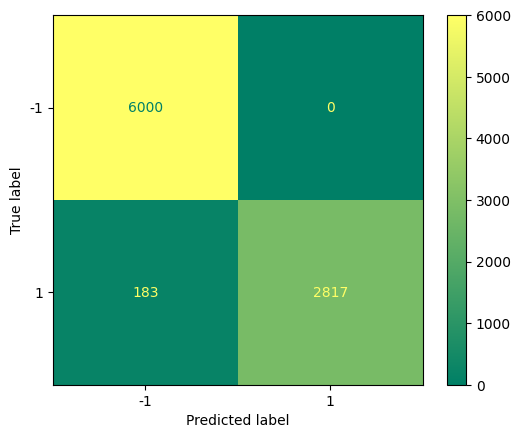

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(dataset_train["Attack"], dataset_train["Anomaly"])
disp_poly = ConfusionMatrixDisplay.from_predictions(dataset_train["Attack"], dataset_train["Anomaly"],cmap='summer')

## Testing

In [25]:
attack=pd.read_csv('FYP Dataset/DDoS1.csv')
attack=attack.append(pd.read_csv('FYP Dataset/DDoS2.csv'))
attack=attack.append(pd.read_csv('FYP Dataset/DDoS3.csv'))
attack=attack.append(pd.read_csv('FYP Dataset/DDoS4.csv'))
attack = attack.sample(frac = 1)
print(len(attack))
attack=attack[:3000]
print(len(attack))

<ipython-input-25-ea84008878aa>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attack=attack.append(pd.read_csv('FYP Dataset/DDoS2.csv'))
<ipython-input-25-ea84008878aa>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attack=attack.append(pd.read_csv('FYP Dataset/DDoS3.csv'))


64993
3000


<ipython-input-25-ea84008878aa>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attack=attack.append(pd.read_csv('FYP Dataset/DDoS4.csv'))


In [26]:
working=pd.read_csv('FYP Dataset/Working1.csv')
working=working.append(pd.read_csv('FYP Dataset/Working2.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working3.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working4.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working5.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working6.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working7.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working8.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working9.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working10.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working11.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working12.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working13.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working14.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working15.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working16.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working17.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working18.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working19.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working20.csv'))
working = working.sample(frac = 1)
print(len(working))
working=working[:60000]
print(len(working))

<ipython-input-26-29d2c14a72bd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working2.csv'))
<ipython-input-26-29d2c14a72bd>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working3.csv'))
<ipython-input-26-29d2c14a72bd>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working4.csv'))
<ipython-input-26-29d2c14a72bd>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working5.csv'))
<ipython-input-26-29d2c14a72bd>:6: FutureWarning: The frame.appe

60659
60000


<ipython-input-26-29d2c14a72bd>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working20.csv'))


In [27]:
idle=pd.read_csv('FYP Dataset/Idle1.csv')
idle=idle.append(pd.read_csv('FYP Dataset/Idle2.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle3.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle4.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle5.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle6.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle7.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle8.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle9.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle10.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle11.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle12.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle13.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle14.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle15.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle16.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle17.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle18.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle19.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle20.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle21.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle22.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle23.csv'))
idle = idle.sample(frac = 1)
print(len(idle))
idle=idle[:37000]
print(len(idle))

<ipython-input-27-ecbdf109c35f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle2.csv'))
<ipython-input-27-ecbdf109c35f>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle3.csv'))
<ipython-input-27-ecbdf109c35f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle4.csv'))
<ipython-input-27-ecbdf109c35f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle5.csv'))
<ipython-input-27-ecbdf109c35f>:6: FutureWarning: The frame.append method is deprecated and will be 

42950
37000


<ipython-input-27-ecbdf109c35f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle23.csv'))


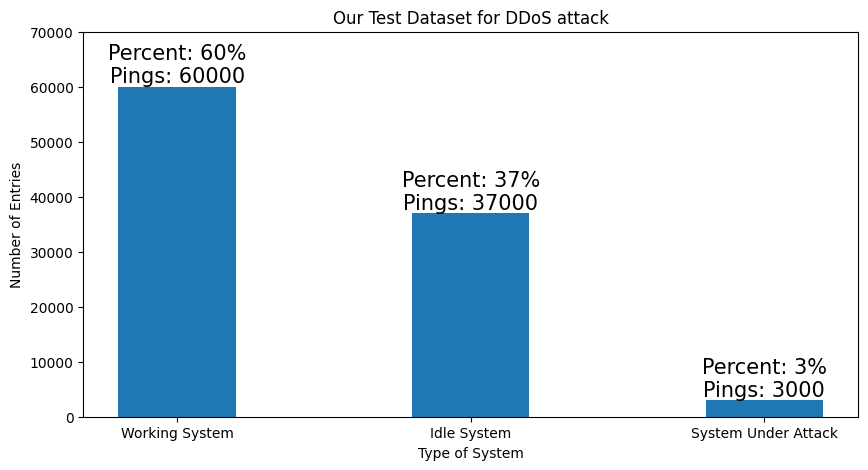

In [28]:
data={'Working System': len(working), 'Idle System': len(idle), 'System Under Attack': len(attack)}
typeOfSystem= list(data.keys())
NumberOfEntries=list(data.values())
fig = plt.figure(figsize = (10, 5))
total=len(working)+len(idle)+len(attack)
graph=plt.bar(typeOfSystem, NumberOfEntries,
        width = 0.4)
for bar in graph:
    height = bar.get_height()
    percent=height*100/total
    plt.annotate( "Percent: {}%\nPings: {}".format(int(percent),height),(bar.get_x() + bar.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)
plt.ylim(0, 70000)
plt.xlabel("Type of System")
plt.ylabel("Number of Entries")
plt.title("Our Test Dataset for DDoS attack")
plt.show()

In [29]:
idle["Attack"] = -1
working["Attack"] = -1
attack["Attack"] = 1

In [30]:
ls=[working,idle,attack]
dataset_test=pd.concat(ls)

In [31]:
len(dataset_test)

100000

In [32]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Local Host,Remote Host,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack
408,UDP,192.168.137.84,192.168.137.1,64196.0,53.0,LAPTOP-54PG1OGH.mshome.net,DESKTOP-BROM922.mshome.net,domain,4,600 Bytes,772 Bytes,0.0 KB/Sec,11/7/2022 4:57:10 PM:126,11/7/2022 5:26:30 PM:455,29:20.3,-1
556,TCP,192.168.29.50,34.64.233.111,57904.0,443.0,Sumedha,e2c5.gcp.gvt2.com,https,36,"7,576 Bytes","9,573 Bytes",1.9 KB/Sec,12/15/2022 6:10:19 PM:023,12/15/2022 6:10:22 PM:922,00:03.9,-1
2582,UDP,192.168.29.50,192.168.29.184,63716.0,1900.0,Sumedha,NaN,ssdp,4,932 Bytes,"1,305 Bytes",0.3 KB/Sec,12/17/2022 11:31:31 AM:186,12/17/2022 11:31:34 AM:183,00:03.0,-1
256,TCP,192.168.137.84,52.223.40.198,56486.0,443.0,LAPTOP-54PG1OGH.mshome.net,a6370ebea231e0c9a.awsglobalaccelerator.com,https,20,"4,499 Bytes","5,868 Bytes",0.1 KB/Sec,11/7/2022 4:56:24 PM:019,11/7/2022 4:57:24 PM:384,01:00.4,-1
8119,TCP,192.168.29.50,54.88.1.130,51130.0,443.0,Sumedha,NaN,https,34,"9,490 Bytes","11,407 Bytes",0.9 KB/Sec,12/24/2022 5:22:58 PM:368,12/24/2022 5:23:08 PM:387,00:10.0,-1


In [33]:
dataset_test = dataset_test.drop(["Local Host","Remote Host","Service Name","Capture Time","Last Packet Time"],axis=1)
dataset_test = dataset_test.reset_index(drop = True)
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack
0,UDP,192.168.137.84,192.168.137.1,64196.0,53.0,4,600 Bytes,772 Bytes,0.0 KB/Sec,29:20.3,-1
1,TCP,192.168.29.50,34.64.233.111,57904.0,443.0,36,"7,576 Bytes","9,573 Bytes",1.9 KB/Sec,00:03.9,-1
2,UDP,192.168.29.50,192.168.29.184,63716.0,1900.0,4,932 Bytes,"1,305 Bytes",0.3 KB/Sec,00:03.0,-1
3,TCP,192.168.137.84,52.223.40.198,56486.0,443.0,20,"4,499 Bytes","5,868 Bytes",0.1 KB/Sec,01:00.4,-1
4,TCP,192.168.29.50,54.88.1.130,51130.0,443.0,34,"9,490 Bytes","11,407 Bytes",0.9 KB/Sec,00:10.0,-1


In [34]:
dataset_test['Throughput']=0

In [35]:
dataset_test["Duration in seconds"] = 0

In [36]:
import string
from datetime import datetime
for i in range(len(dataset_test)):
  t = datetime.strptime(dataset_test["Duration"][i].split('.')[0], '%M:%S').time()
  dataset_test["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
  
  if(type(dataset_test["Packets"][i])==int or type(dataset_test["Packets"][i])==float):
    dataset_test["Packets"][i] = dataset_test["Packets"][i]
  else:
    if(type(dataset_test["Packets"][i])==str):
      dataset_test["Packets"][i] = dataset_test["Packets"][i].translate(str.maketrans('', '', string.punctuation))
      dataset_test["Packets"][i] = int(dataset_test["Packets"][i].split(' ')[0])
      dataset_test["Packets"][i] = int(dataset_test["Packets"][i])

<ipython-input-36-ee91ebca76a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
<ipython-input-36-ee91ebca76a1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Packets"][i] = dataset_test["Packets"][i].translate(str.maketrans('', '', string.punctuation))
<ipython-input-36-ee91ebca76a1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset

In [37]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,UDP,192.168.137.84,192.168.137.1,64196.0,53.0,4,600 Bytes,772 Bytes,0.0 KB/Sec,29:20.3,-1,0,1760
1,TCP,192.168.29.50,34.64.233.111,57904.0,443.0,36,"7,576 Bytes","9,573 Bytes",1.9 KB/Sec,00:03.9,-1,0,3
2,UDP,192.168.29.50,192.168.29.184,63716.0,1900.0,4,932 Bytes,"1,305 Bytes",0.3 KB/Sec,00:03.0,-1,0,3
3,TCP,192.168.137.84,52.223.40.198,56486.0,443.0,20,"4,499 Bytes","5,868 Bytes",0.1 KB/Sec,01:00.4,-1,0,60
4,TCP,192.168.29.50,54.88.1.130,51130.0,443.0,34,"9,490 Bytes","11,407 Bytes",0.9 KB/Sec,00:10.0,-1,0,10


In [38]:
for i in range(len(dataset_test)):
  val = dataset_test["Packets"][i]/dataset_test["Duration in seconds"][i]
  if val==np.inf or val==-np.inf:
    val = 10**15
  dataset_test["Throughput"][i] = val

<ipython-input-38-f3b1ecf7bb72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Throughput"][i] = val
<ipython-input-38-f3b1ecf7bb72>:2: RuntimeWarning: divide by zero encountered in long_scalars
  val = dataset_test["Packets"][i]/dataset_test["Duration in seconds"][i]


In [39]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,UDP,192.168.137.84,192.168.137.1,64196.0,53.0,4,600 Bytes,772 Bytes,0.0 KB/Sec,29:20.3,-1,0.002273,1760
1,TCP,192.168.29.50,34.64.233.111,57904.0,443.0,36,"7,576 Bytes","9,573 Bytes",1.9 KB/Sec,00:03.9,-1,12.000000,3
2,UDP,192.168.29.50,192.168.29.184,63716.0,1900.0,4,932 Bytes,"1,305 Bytes",0.3 KB/Sec,00:03.0,-1,1.333333,3
3,TCP,192.168.137.84,52.223.40.198,56486.0,443.0,20,"4,499 Bytes","5,868 Bytes",0.1 KB/Sec,01:00.4,-1,0.333333,60
4,TCP,192.168.29.50,54.88.1.130,51130.0,443.0,34,"9,490 Bytes","11,407 Bytes",0.9 KB/Sec,00:10.0,-1,3.400000,10


In [40]:
dataset_test=dataset_test.sort_values(by=['Throughput'])

In [41]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
67827,UDP,192.168.29.184,239.255.255.250,51991.0,1900.0,2,696 Bytes,"1,128 Bytes",0.0 KB/Sec,59:59.8,-1,0.000556,3599
87577,UDP,192.168.29.184,239.255.255.250,36618.0,1900.0,2,634 Bytes,"1,068 Bytes",0.0 KB/Sec,59:59.4,-1,0.000556,3599
35542,UDP,192.168.29.184,239.255.255.250,51506.0,1900.0,2,641 Bytes,"1,018 Bytes",0.0 KB/Sec,59:59.9,-1,0.000556,3599
68744,UDP,192.168.29.184,239.255.255.250,55895.0,1900.0,2,641 Bytes,"1,018 Bytes",0.0 KB/Sec,59:59.7,-1,0.000556,3599
42161,UDP,192.168.29.184,239.255.255.250,41146.0,1900.0,2,688 Bytes,"1,122 Bytes",0.0 KB/Sec,59:59.6,-1,0.000556,3599


In [42]:
throughput=dataset_test['Throughput']

In [43]:
throughput.replace([np.inf, -np.inf], np.nan, inplace=True)
throughput.dropna(how="all", inplace=True)

In [44]:
data=dataset_test["Throughput"].tolist()

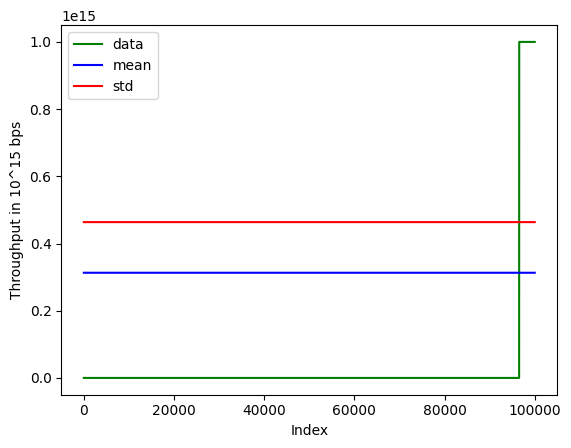

In [45]:
df = pd.DataFrame({
      'data': data,
      'mean': [mean for i in range(len(data))],
      'std': [stdev for i in range(len(data))]})
df.plot( color="gbr")
plt.xlabel("Index")
plt.ylabel("Throughput in 10^15 bps")
plt.show()

In [46]:
dataset_test["Anomaly"] = 1
dataset_test.replace(np.nan,np.inf,inplace=True)
for i in range(0,len(dataset_test["Total Size"])):
  if(abs(dataset_test["Throughput"][i]-mean)<stdev):
    dataset_test["Anomaly"][i] = -1

<ipython-input-46-f9ec2a4c19b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Anomaly"][i] = -1


In [47]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score,recall_score, classification_report
tn, fp, fn, tp = confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly"]).ravel()
precision = precision_score(dataset_test["Attack"], dataset_test["Anomaly"])
accuracy = accuracy_score(dataset_test["Attack"], dataset_test["Anomaly"])
recall=recall_score(dataset_test["Attack"], dataset_test["Anomaly"])
f1_score = f1_score(dataset_test["Attack"], dataset_test["Anomaly"])
ClassificationReport=classification_report(dataset_test["Attack"], dataset_test["Anomaly"])
print("True Positives: ",tp)
print("\nFalse Positives: ",fp)
print("\nTrue Negatives: ",tn)
print("\nFalse Negatives: ",fn)
print("\nAccuracy: ",accuracy)
print("\nPrecision: ",precision)
print("\nRecall: ",recall)
print("\nF1 Score: ",f1_score)
print("\nClassification Report: \n")
print(ClassificationReport)

True Positives:  2554

False Positives:  910

True Negatives:  96090

False Negatives:  446

Accuracy:  0.98644

Precision:  0.7372979214780601

Recall:  0.8513333333333334

F1 Score:  0.7902227722772277

Classification Report: 

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99     97000
           1       0.74      0.85      0.79      3000

    accuracy                           0.99    100000
   macro avg       0.87      0.92      0.89    100000
weighted avg       0.99      0.99      0.99    100000



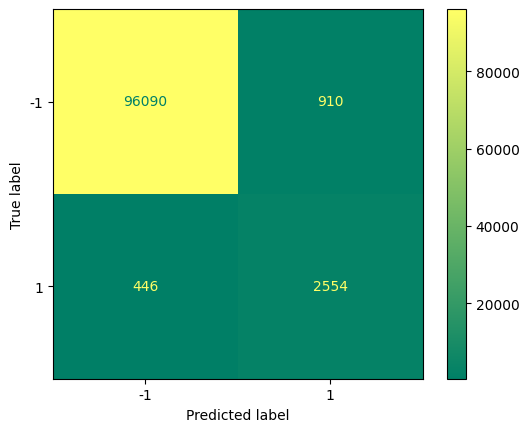

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly"])
disp_poly = ConfusionMatrixDisplay.from_predictions(dataset_test["Attack"], dataset_test["Anomaly"],cmap='summer')